In [44]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [100]:
wikidata_rdfmt = json.load(open('../data/rdfmt/wikidata-rdfmt.json'))['wikidata']
dbpedia_rdfmt = json.load(open('../data/rdfmt/dbpedia-rdfmt.json'))['dbpedia']
yago_rdfmt = json.load(open('../data/rdfmt/yago-rdfmt.json'))['yago']
linkedmdb_rdfmt = json.load(open('../data/rdfmt/linkedmdb-rdfmt.json'))['linkedmdb']
musicbrainz_rdfmt = json.load(open('../data/rdfmt/musicbrainz-rdfmt.json'))['musicbrainz']

# General Statistics

In [95]:
classes = json.load(open('../data/classes.json'))
answers = json.load(open('../data/all-query-results.json'))

In [94]:
classes_numbers = {}
for kg, values in classes.iteritems():
    classes_numbers[kg] = set()
    for key, value in values.iteritems():
        for v in value: 
            classes_numbers[kg].add(v)

for kg, cls in classes_numbers.iteritems():
    print kg, len(cls)

YAGO 13642
DBpedia 112888
linkedmdb 4
wikidata 874
MusicBrainz 3


[u'hi', u'en', u'es']

# Subject Labeling

In [52]:
wd_subject_labeling = {}
for cl, data in wikidata_rdfmt.iteritems():
    if 'subject_labeling' not in data or 'http' not in data:
        continue
    if data['subject_labeling']:
        wd_subject_labeling[cl] = data['subject_labeling']
    else:
        wd_subject_labeling[cl] = 0
        
dbpedia_subject_labeling = {}
for cl, data in dbpedia_rdfmt.iteritems():
    if data['subject_labeling']:
        dbpedia_subject_labeling[cl] = data['subject_labeling']
    else:
        dbpedia_subject_labeling[cl] = 0

#yago_subject_labeling = {}
#for cl, data in yago_rdfmt.iteritems():
#    if not data['subject_labeling']:
#        data['subject_labeling'] = 0
#    yago_subject_labeling[cl] = data['subject_labeling']

linkedmdb_subject_labeling = {}
for cl, data in linkedmdb_rdfmt.iteritems():
    if data['subject_labeling']:
        linkedmdb_subject_labeling[cl] = data['subject_labeling']
    else:
        linkedmdb_subject_labeling[cl] = 0

musicbrainz_subject_labeling = {}
for cl, data in musicbrainz_rdfmt.iteritems():
    if data['subject_labeling']:
        musicbrainz_subject_labeling[cl] = data['subject_labeling']
    else: 
        musicbrainz_subject_labeling[cl] = 0

In [5]:
print dbpedia_subject_labeling.values()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9975903614457832, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.9908368967623702, 0.9767441860465116, 0.9870717517776342, 1.0, 1.0, 0.9318181818181818, 0.9916666666666667, 1.0, 1.0, 1.0, 1.0, 0.9838709677419355, 0.9845201238390093, 1.0, 1.0, 1.0, 1.0, 0.9743589743589743, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9869565217391304, 1.0, 0.9815602836879432, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9943820224719101, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9886363636363636, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9893048128342246, 1.0, 1.0, 1.0, 0.99541

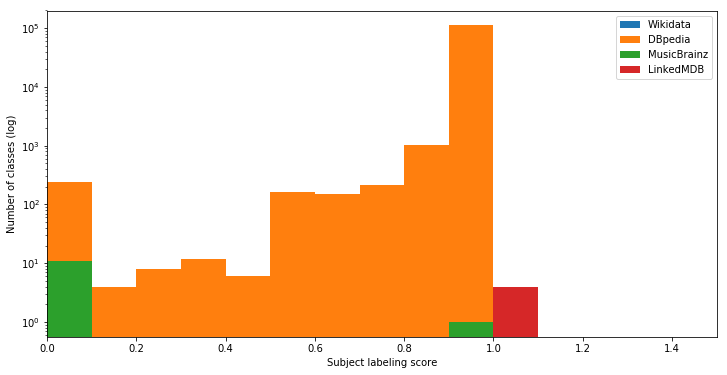

In [55]:
plt.hist(wd_subject_labeling.values(), label='Wikidata')
plt.hist(dbpedia_subject_labeling.values(), label='DBpedia')
#plt.hist(yago_subject_labeling.values(), label='YAGO')
plt.hist(musicbrainz_subject_labeling.values(), label='MusicBrainz')
plt.hist(linkedmdb_subject_labeling.values(), label='LinkedMDB')

plt.yscale('log')
plt.xlim(0, 1.5)
plt.legend(loc='upper right')
plt.xlabel('Subject labeling score')
plt.ylabel('Number of classes (log)')
plt.savefig('subject-labeling-score-all.pdf')

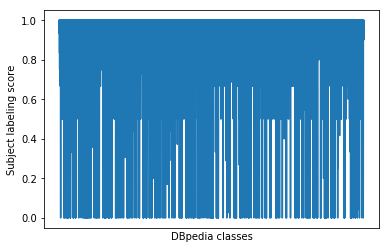

In [10]:
plt.plot(dbpedia_subject_labeling.values())

plt.xticks([])
plt.xlabel('DBpedia classes')
plt.ylabel('Subject labeling score')
plt.savefig('subject-labeling-score-dbpedia.pdf')

# For each KG, the metrics

In [104]:
import numbers
data_wd = {}
for x in yago_rdfmt.values():
    for metric, data in x.iteritems():
        if not isinstance(data, numbers.Number) or not data <= 1:
            print metric
            continue
        if metric in data_wd:
            data_wd[metric].append(data)
        else:
            data_wd[metric] = [data]

size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subject

size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples

ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_trip

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subject

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_langu

ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_lan

ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_trip

size_triples
languages_share
ds_size_triples
number_languages
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sha

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subject

ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_trip

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_langu

size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples

ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_trip

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subj

size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subject

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subject

languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_share
ds_size_triples
number_languages
size_subjects
size_triples
languages_sh

size_subjects
ds_class_labeling
entities_2_5_lang
number_languages
entities_11_50_lang
unambiguity
subject_labeling
entities_1_lang
entities_50+_lang
entities_6_10_lang


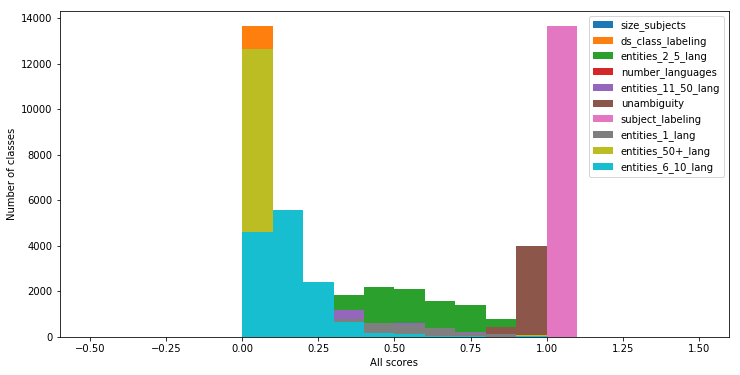

In [102]:
for key, value in data_wd.iteritems():
    plt.hist(value, label=key)
    print key
plt.rcParams["figure.figsize"] = [12,6]
plt.legend(loc='upper right')
plt.xlabel('All scores')
plt.ylabel('Number of classes')

plt.savefig('wikidata-all-metrics-classes.pdf')

# Radar Chart

In [81]:
wikidata_rdfmt = json.load(open('../data/rdfmt/wikidata-rdfmt.json'))['wikidata']
dbpedia_rdfmt = json.load(open('../data/rdfmt/dbpedia-rdfmt.json'))['dbpedia']
yago_rdfmt = json.load(open('../data/rdfmt/yago-rdfmt.json'))['yago']
linkedmdb_rdfmt = json.load(open('../data/rdfmt/linkedmdb-rdfmt.json'))['linkedmdb']
musicbrainz_rdfmt = json.load(open('../data/rdfmt/musicbrainz-rdfmt.json'))['musicbrainz']

In [82]:
def get_average(rdfmt):
    data = {}
    d = {}
    for k,v in rdfmt.iteritems():
            for x,y in v.iteritems():
                if y == [] or y > 1 or x == 'size_subjects' or x == 'size_triples' or x == 'number_languages':
                    continue
                if x == 'languages_share':
                    print y.values()
                    if 'largest_language' in data:
                        data['largest_language'] = append(max(y.values()))
                    else: 
                        data['largest_language'] = [max(y.values())]
                    continue
                if x in data:
                    data[x].append(y)
                else:
                    data[x] = [y]
    for x,y in data.iteritems():
        d[x] = np.mean(y)
    return d

w_rdfmt = get_average(wikidata_rdfmt)
d_rdfmt = get_average(dbpedia_rdfmt)
y_rdfmt = get_average(yago_rdfmt)
m_rdfmt = get_average(musicbrainz_rdfmt)
l_rdfmt = get_average(linkedmdb_rdfmt)

In [83]:
data = ['Wikidata', 'DBpedia', 'YAGO', 'MusicBrainz', 'LinkedMDB']
keys = {}
for k in w_rdfmt.keys():
    keys[k] = [w_rdfmt[k], d_rdfmt[k], y_rdfmt[k], m_rdfmt[k], l_rdfmt[k]]

In [84]:
d = {}
d['group'] = data
d.update(keys)

df = pd.DataFrame(d)
print df

   ds_class_labeling  entities_11_50_lang  entities_1_lang  entities_2_5_lang  \
0           0.009695             0.218135         0.225104           0.306066   
1           0.000981             0.160993         0.540018           0.496922   
2           0.014002             0.127019         0.233507           0.494048   
3           0.129032             0.000000         1.000000           0.000000   
4           0.055556             0.000000         1.000000           0.000000   

   entities_50+_lang  entities_6_10_lang        group  subject_labeling  \
0           0.137226            0.113290     Wikidata          0.999821   
1           0.000000            0.266331      DBpedia          0.994199   
2           0.003425            0.138589         YAGO          1.000000   
3           0.000000            0.000000  MusicBrainz          0.083333   
4           0.000000            0.000000    LinkedMDB          1.000000   

   unambiguity  
0     1.000000  
1     1.000000  
2     0.998

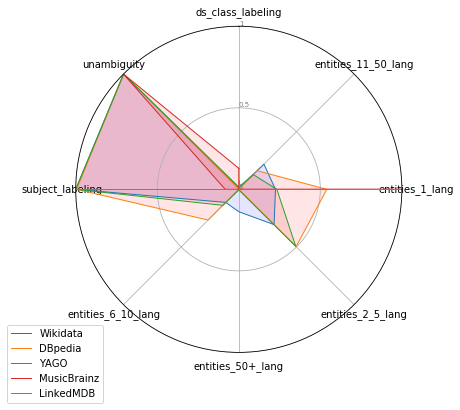

In [85]:
# ------- PART 1: Create background
from math import pi 
# number of variable
categories=list(df.drop('group', axis=1))
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=7)
plt.ylim(0,1)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
    
# Wikidata
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[0])
ax.fill(angles, values, 'b', alpha=0.1)
 
# DBpedia
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[1])
ax.fill(angles, values, 'r', alpha=0.1)

# YAGO
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[2])
ax.fill(angles, values, 'r', alpha=0.1)

# MusicBrainz
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[3])
ax.fill(angles, values, 'r', alpha=0.1)

# LinkedMDB
values=df.loc[4].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[4])
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('radar-all.pdf')

[u'wikicat_Sinai_Beach_albums', u'wikicat_Polish_chess_writers', u'wikicat_South_Korean_pacifists', u'wikicat_Women_in_war_in_Southeast_Asia', u'wikicat_S.S._Villacidrese_Calcio_players', u'wikicat_Kinvara_hurlers', u'wikicat_Trigeminal_nerve_disorders', u'wikicat_Operatic_basses', u'wikicat_Welsh_people_of_Kashmiri_descent', u'wikicat_Government_buildings_in_Washington,_D.C.']
0.0140023544568
ds_class_labeling
1
unambiguity
0
subject_labeling


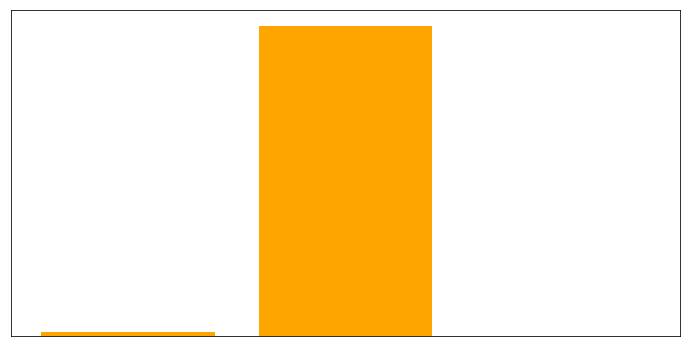

In [163]:
dbpedia_rdfmt['http://dbpedia.org/ontology/Location']
values = []
keys = []
ls = []
print yago_rdfmt.keys()[:10]
for k,v in yago_rdfmt['wikicat_Polish_chess_writers'].iteritems():
    if k != 'languages_share':
        if v <= 1:
            print v
            values.append(v)
            print k
            keys.append(k)
    else: 
        for lang,langv in v.iteritems():
            ls.append(langv)


#keys.append('languages')
x = np.arange(len(keys))
#width = 0.1
plt.bar(x, values, color='orange')
#for l in range(len(ls)):
#    if l > 0:
#        plt.bar(x, ls[l], width, bottom=ls[l - 1])
#    else: 
#        print ls[l]
#        plt.bar(x, ls[l])
    
plt.xticks([])
plt.yticks([])
plt.savefig('rdfmt-yago1.png')

# Ranking Results